#  Project 9

# Introduction

The present project aims to work with a database belonging to the OilyGiant mining company, the objective of this project is to find the best place for a new well, in order to choose the location, it is necessary to follow this steps:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

We have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.


**Steps** 

Geological exploration data for the three regions are stored in files:

- (/datasets/geo_data_0.csv).
- (/datasets/geo_data_1.csv).
- (/datasets/geo_data_2.csv).


This project will consist of the following steps:
 1. Download and prepare the data. Explain the procedure.
 - 1.1. Importing the libraries
 - 1.2. Downloading the data.
 - 1.3. Study the general information.
 - 1.4. Prepare the data
 2. Train and test the model for each region:
 - 2.1. Split the data into a training set and validation set at a ratio of 75:25.
 - 2.2. Train the model and make predictions for the validation set.
 - 2.3. Save the predictions and correct answers for the validation set.
 - 2.4. Print the average volume of predicted reserves and model RMSE.
 - 2.5. Analyze the results.
 3. Prepare for profit calculation:
 - 3.1. Store all key values for calculations in separate variables.
 - 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
 - 3.3. Provide the findings about the preparation for profit calculation step.
 4. Write a function to calculate profit from a set of selected oil wells and model predictions:
 - 4.1. Pick the wells with the highest values of predictions. 
 - 4.2. Summarize the target volume of reserves in accordance with these predictions
 - 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.
 5. Calculate risks and profit for each region:
 - 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
 - 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
 - 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.
 6. General conclusion

## 1. Download and prepare the data. Explain the procedure.

**1.1. Importing the libraries**

In [1]:
# Loading all the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:
%matplotlib inline

In [3]:
# Constants

BUDGET = 100000000

WELLS_TO_DEVELOP = 200

#Revenue per unit = $4,500 (since 1 unit = 1,000 barrels × $4.5 per barrel)
PRICE_PER_UNIT = 4500 # dollars per 1000 barrels

**1.2. Downloading the data and storing them to df**

In [4]:
# reading the file and storing them to df
region_0 = pd.read_csv("/datasets/geo_data_0.csv")

In [5]:
region_1 = pd.read_csv("/datasets/geo_data_1.csv")

In [6]:
region_2 = pd.read_csv("/datasets/geo_data_2.csv")

**1.3. Study the general information**

In [7]:
# previewing the first 10 rows from the region_0
region_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [8]:
# previewing the first 10 rows from the region_1
region_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [9]:
# previewing the first 10 rows from the region_2
region_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [10]:
#We'll obtain the general information about the region_0 with info():
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
#We'll obtain the general information about the region_1 with info():
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
#We'll obtain the general information about the region_2 with info():
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Comment

The 3 tables from the three regions are distributed in the following columns:

- `'id'`: unique oil well identifier
- `'f0 '`: features of points
- `'f1'`: features of points
- `'f2'`: features of points
- `'product'`: volume of reserves in the oil well (thousand barrels).
    
All the tables  are store in 5 columns and 10000 entries with 0 int64, 4 float64 and 1 object data type. 
From the summary information that info() shows we don't see any missing values, and see a correct data types.
The id column is not needed for the model itself, as it's just a unique identifier for each well. It doesn't provide any predictive value for modeling and should be excluded from the feature set when training the model. 

As it could be useful to evaluate each region individually for profit potential and risk, we don't consider to process the three tables combining them.


**1.4. Prepare the data**

In [13]:
# calculating missing values for region_0
region_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
# calculating missing values for region_1
region_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [15]:
# calculating missing values for region_2
region_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [16]:
# counting duplicate rows for region_0
duplicates_0 =region_0.duplicated()
duplicates_0.sum()

0

In [17]:
# counting duplicate rows for region_1
duplicates_1 =region_1.duplicated()
duplicates_1.sum()

0

In [18]:
# counting duplicate rows for region_2
duplicates_2 =region_2.duplicated()
duplicates_2.sum()

0

In [19]:
# counting duplicate rows for region_0 in id column
duplicated_ids_0 = region_0[region_0['id'].duplicated()]['id']
duplicated_ids_0

7530     HZww2
41724    bxg6G
51970    A5aEY
63593    QcMuo
66136    74z30
69163    AGS9W
75715    Tdehs
90815    fiKDv
92341    TtcGQ
97785    bsk9y
Name: id, dtype: object

In [20]:
# counting duplicate rows for region_1 in id column
duplicated_ids_1 = region_1[region_1['id'].duplicated()]['id']
duplicated_ids_1

41906    LHZR0
82178    bfPNe
82873    wt4Uk
84461    5ltQ6
Name: id, dtype: object

In [21]:
# counting duplicate rows for region_2 in id column
duplicated_ids_2 = region_2[region_2['id'].duplicated()]['id']
duplicated_ids_2

43233    xCHr8
49564    VF7Jo
55967    KUPhW
95090    Vcm5J
Name: id, dtype: object

### **Feature and Target Distribution Plots for region_0**

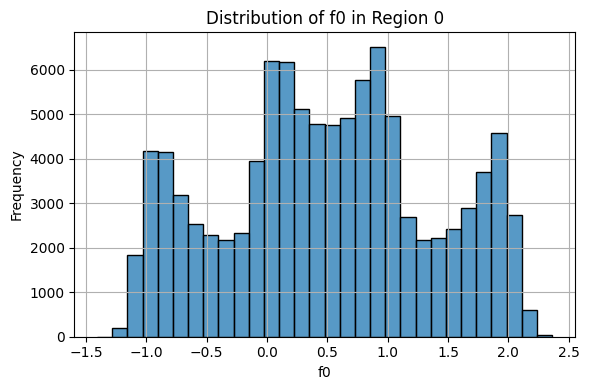

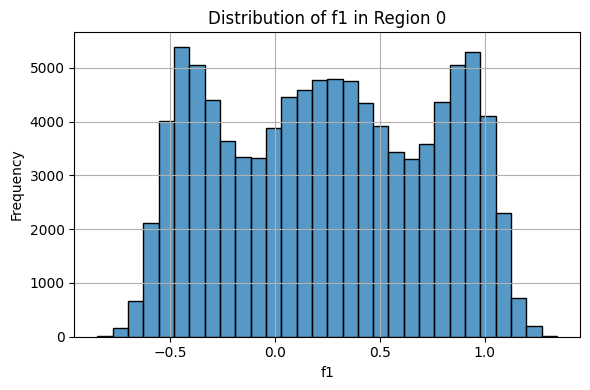

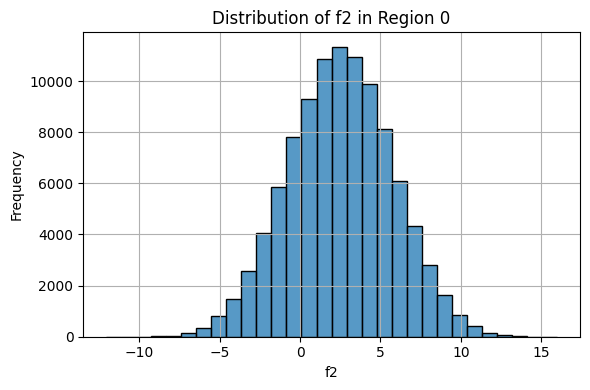

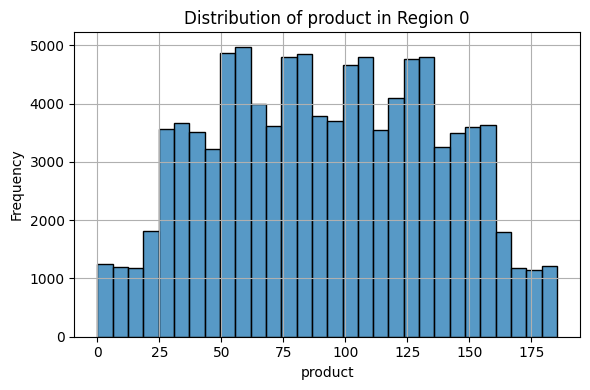

In [59]:
# Plotting histograms for each column in Region 0
for column in region_0.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(region_0[column], bins=30)
    plt.title(f'Distribution of {column} in Region 0')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Comment - Feature and Target Distributions – Region 0

#### Feature `f0`
The distribution of f0 is irregular and multimodal, with several distinct peaks and valleys. It starts near -1.5, rises to a peak around 4,000, dips near -0.6, then rises again to a second peak around 6,000 near 0.1. This pattern of alternating highs and lows continues across the axis, indicating a non-normal and possibly clustered feature behavior.
#### Feature `f1`
The f1 distribution  is also multimodal with multiple moderate peaks. It starts at -0.6, rises to about 5,000, then dips and rises again repeatedly across the feature range. Looks more symmetrical than f0, suggesting some consistency, but still not a standard distribution.

#### Feature `f2`
This feature is more like a normal distribution, peaking sharply around 10,800 near the center of the axis and tapering off smoothly toward both extremes. This indicates a well-balanced and symmetric variable—ideal for most modeling approaches.

#### Target: `product`
The product distribution shows a multimodal pattern, starting slowly at low values, rising steadily to about 3,600 at product value 30, then forming four rounded peaks around 4,600. Toward the higher end of the range, the distribution smoothly declines, suggesting that while high production is possible, it is less frequent than mid-range values.

### **Feature and Target Distribution Plots for region_1**

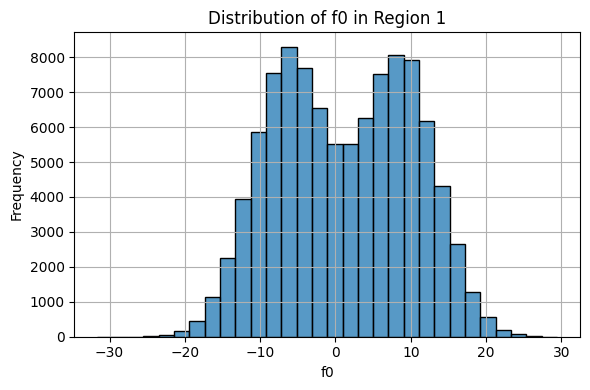

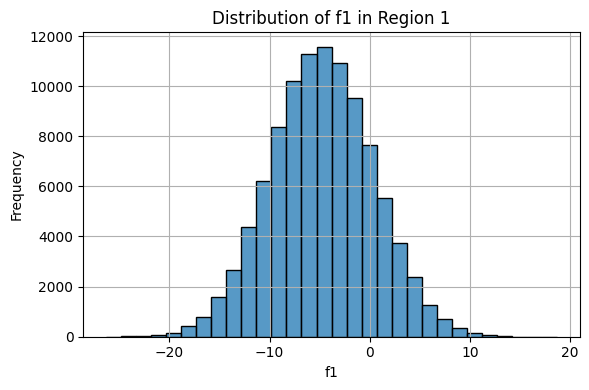

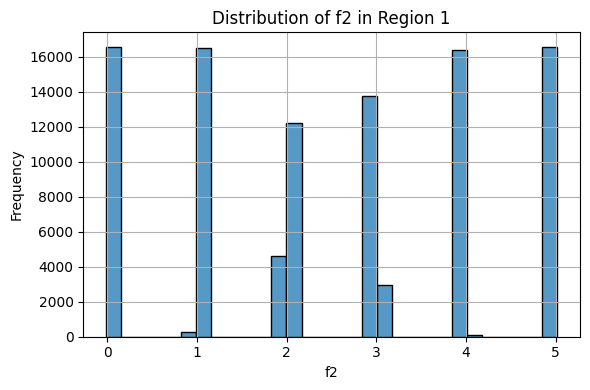

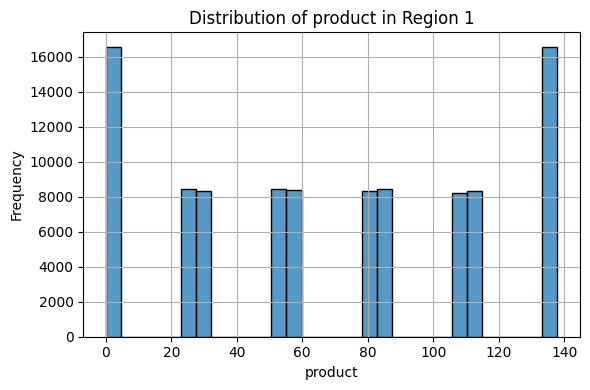

In [23]:
# Plotting histograms for each column in Region 1
for column in region_1.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(region_1[column], bins=30)
    plt.title(f'Distribution of {column} in Region 1')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Comment - Feature and Target Distributions – Region 1
#### Feature `f0`
The distribution of f0 appears multimodal, with an initial peak around -29 (reaching approximately 8,100 counts), a dip near -15, and a second peak close to 0, again reaching 8,000. After that, the frequency decreases steadily toward the maximum value (~30). This suggests that f0 might represent data from more than one process.

#### Feature `f1`
The distribution of f1 is approximately normally distributed, with a central peak at 0 reaching almost 11,900 counts, and symmetric tails that drop off on both sides. This typical bell-shaped curve indicates that f1 is well-balanced around the mean and might be well-suited for linear modeling.

#### Feature `f2`
The histogram shows two very high peaks at the edges and a cluster of lower bars in the middle. The tallest bars (~16,500) are at the beginning and end, while the central bars lie between 12,000 and 14,000. This suggests that most values of f2 are concentrated toward the minimum and maximum, with fewer observations in between.

#### Target: `product`
The target variable shows a bimodal distribution: the first and last bars reach about 16,300, while all the middle bars are evenly distributed around 8,100. This suggests that oil production values tend to cluster at very low and very high values, which may complicate modeling or indicate two distinct well behaviors.


### **Feature and Target Distribution Plots for region 2**

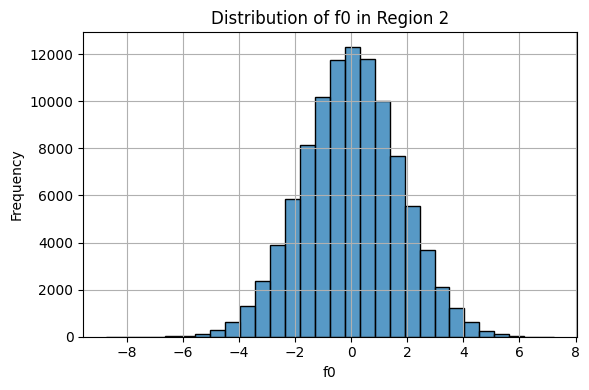

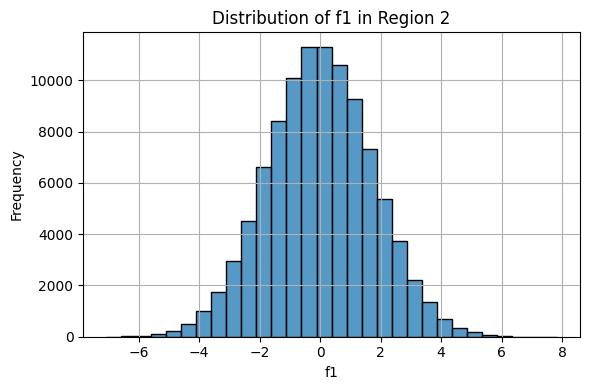

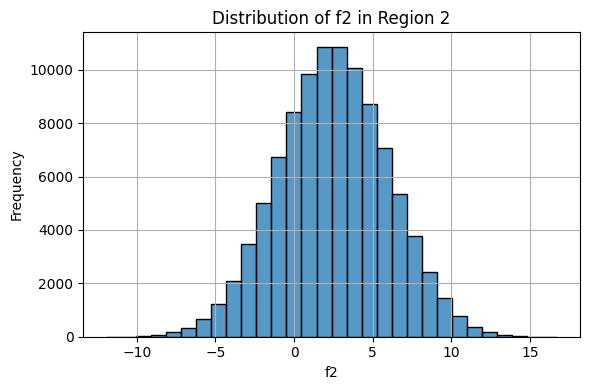

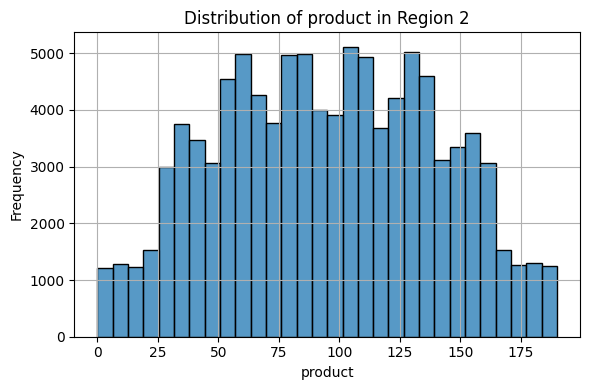

In [24]:
# Plotting histograms for each column in Region 2
for column in region_2.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(region_2[column], bins=30)
    plt.title(f'Distribution of {column} in Region 2')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Comment - Feature and Target Distributions – Region 2
#### Feature `f0`
The distribution of f0 is approximately normal, starting near -8.5 with a steady rise, peaking around 12,100 counts close to 0, and then symmetrically decreasing toward 7.1. This indicates that f0 values are centered and balanced around the mean, which is favorable for many statistical models.
#### Feature `f1`
The f1 feature also displays a normal distribution, beginning at -7.1, peaking at approximately 11,500 near 0, and tapering off toward 8. This bell-shaped curve confirms a stable and centered distribution, suggesting consistency in the underlying data generation process.
#### Feature `f2`
The distribution of f2 follows a normal shape as well, with values starting around -13, peaking at about 11,000 near 0, and declining toward 16. This consistent bell curve suggests f2 is well-behaved and symmetric—ideal for many types of analysis.

#### Target: `product`
The product distribution is more complex. It starts with a low, smooth rise from 0 to 30 (reaching ~3,600), followed by four more pronounced curves, each reaching around 5,000. The final few intervals decrease gradually, mirroring the initial ones. This indicates a multimodal distribution, possibly reflecting several patterns or groups in production behavior.


## Summary
* Region 0 shows the most varied and non-standard distributions in features f0 and f1, but has a normally distributed f2 and a well-behaved target variable.

* Region 1 has a normal f1, but more irregularity in f0 and f2, and its target variable shows unusual uniformity, which may affect predictability.

* Region 2 stands out with all features (f0, f1, f2) following normal distributions, which is ideal for most machine learning models. The target also behaves predictably, with a concentration around mid-values.


## 2. Train and test the model for each region:

**2.1. Split the data into a training set and validation set at a ratio of 75:25.**

**Region 0**

In [25]:
# Region 0
features_0 = region_0.drop(['id', 'product'], axis=1)
target_0 = region_0['product']
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345
)

**Region 1**

In [26]:
# Region 1
features_1 = region_1.drop(['id', 'product'], axis=1)
target_1 = region_1['product']
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345
)

**Region 2**

In [27]:
# Region 2
features_2 = region_2.drop(['id', 'product'], axis=1)
target_2 = region_2['product']
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345
)

**2.2. Train the model and make predictions for the validation set.**

**2.3. Save the predictions and correct answers for the validation set.**

In [28]:
# using a function to handle all three regions
def train_and_evaluate(features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    return model, predictions, rmse

**Region 0**

In [29]:
# Region 0
# Predict and evaluate
# get model predictions on validation set
model_0, predictions_valid_0, rmse_0 = train_and_evaluate(features_train_0, target_train_0,
                                                          features_valid_0, target_valid_0)


**Region 1**

In [30]:
# Region 1
# Predict and evaluate
# get model predictions on validation set
model_1, predictions_valid_1, rmse_1 = train_and_evaluate(features_train_1, target_train_1,
                                                          features_valid_1, target_valid_1)


**Region 2**

In [31]:
# Region 2
# Predict and evaluate
# get model predictions on validation set
model_2, predictions_valid_2, rmse_2 = train_and_evaluate(features_train_2, target_train_2,
                                                          features_valid_2, target_valid_2)


**2.4. Print the average volume of predicted reserves and model RMSE.**

**Region 0**

In [32]:
#calculate the average of the predictions for Region 0
predictions_valid_0.mean()

92.59256778438035

In [33]:
target_valid_0.mean()

92.07859674082927

**Region 1**

In [34]:
#calculate the average of the predictions for Region 1
predictions_valid_1.mean()

68.728546895446

In [35]:
target_valid_1.mean()

68.72313602435997

**Region 2**

In [36]:
#calculate the average of the predictions for Region 2
predictions_valid_2.mean()

94.96504596800489

In [37]:
target_valid_2.mean()

94.88423280885438

**RMSE.**

In [38]:
results = {
    "Region 0": rmse_0,
    "Region 1": rmse_1,
    "Region 2": rmse_2
}

for region, rmse in results.items():
    print(f"{region} - RMSE: {rmse:.2f}")

Region 0 - RMSE: 37.58
Region 1 - RMSE: 0.89
Region 2 - RMSE: 40.03


**2.5. Analyze the results.**

**For Region 0:** 

- Average predicted reserves: 92.59 thousand barrels
- Average real reserves: 92.08 thousand barrels
This means the model predicts values very close to the actual average.

For RMSE: 37.58
- On average, the model is off by ±37.6 thousand barrels, considering that the average prediction is ~92.6, the error is quite large — around 40% of the average prediction, wich doesn’t necessarily make the model unusable, but it does reflect a fair amount of uncertainty.

**For Region 1:**

- Average predicted reserves: 68.73 thousand barrels

- Average real reserves: 68.72 thousand barrels

Excellent alignment between predicted and real values a well in Region 1.

For RMSE: 0.89

On average, the model is off by ±0.89 thousand barrels, considering that the average prediction is ~68.7, the error of ~1% of the average prediction, which might be a usable model if the data is accurate for this region.

**For Region 2:**

- Average predicted reserves: 94.97 thousand barrels
- Average real reserves: 94.88 thousand barrels

Predictions are very close to the actual average. 

For RMSE: ~40.03

On average, the model is off by ±40.03 thousand barrels, considering that the average prediction is ~94.97, the error of ~40% of the average prediction, which doesn’t necessarily make the model unusable, but it does reflect a fair amount of uncertainty for this region.

In overall, Region 1 has is suspiciously low compared to the others that make us think that we will will have to check on it later to see if there is not a data leakage,  also this region has a high confidence in prediction, Region 2 has the highest yield, but also high uncertainty and Region 0 is between the two.

## 3. Prepare for profit calculation:

**3.1. Store all key values for calculations in separate variables.**

**3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.**

In [39]:
#What is the minimum amount of oil a well must produce so that it pays for itself

cost_per_well = BUDGET/WELLS_TO_DEVELOP
cost_per_well

500000.0

In [40]:
min_product = cost_per_well/PRICE_PER_UNIT
min_product

111.11111111111111

 This means each well needs to produce at least ~111.1 thousand barrels to have break-even point or to avoid a loss.

### Compare the obtained value with the average volume of reserves in each region.

When comparing the average predicted reserves for each region we have:

Region 0: 92.59 < 111.11 , which is below break-even

Region 1: 68.73 < 111.11 , which is below break-even

Region 2: 94.97 < 111.11 , which is also below break-even

So at this stage, none of the regions are profitable on average.

**3.3.Provide the findings about the preparation for profit calculation step.**

To avoid losses, a well must produce at least 111.1 thousand barrels. Region 1 has an average of 68.7, which is below this threshold, suggesting it may not be profitable. Region 2 averages 94.9 and Region 0 averages 92.6, which both are closer, but still below break-even. This implies careful well selection is necessary, and profit depends on choosing the best 200 wells.

Although the model predictions give us an estimate of expected reserves in each region, it is crucial to also examine the actual average volumes from the validation sets. We find that:

**Break-even Volume:** 111.1

**For Region 0:** has an average real volume of 92.1 thousand barrels, which is below the break-even point of 111.1.
  
**For Region 1:** has an even lower real average of 68.7, far below the break-even threshold.

**For Region 2:** has the highest average at 94.9, but it is still below the minimum required for profitability.

These results indicate that none of the regions meet the break-even volume when considering actual reserves. This reinforces the importance of factoring in economic thresholds and real data (not just predictions) when deciding where to invest.




## 4. Write a function to calculate profit from a set of selected oil wells and model predictions:

**4.1. Pick the wells with the highest values of predictions.**

**4.2. Summarize the target volume of reserves in accordance with these predictions**

In [41]:
#creating the function

#Given values
WELLS_TO_DEVELOP
PRICE_PER_UNIT
BUDGET

def calculate_profit(predictions, target):
#Creating a dataframe with the predicted and the actual values
    df=pd.DataFrame({'predicted': predictions, 'real': target})

    #sorting by predicted reserves in descending order
    top_wells = df.sort_values(by='predicted', ascending=False).head(WELLS_TO_DEVELOP)

    #calculating total revenue from real reserves of the best wels 
    total_revenue = top_wells['real'].sum() * PRICE_PER_UNIT
    #calculating profit when substractin the budget
    profit = total_revenue - BUDGET

    return profit


**Applying the function:**

**4.3.Calculate the profit for the obtained volume of reserves.**

**Region 0**

In [42]:
profit_0 = calculate_profit(
    predictions=predictions_valid_0,
    target=target_valid_0
)
profit_0

33208260.43139851

**Region 1**

In [43]:
profit_1 = calculate_profit(
    predictions=predictions_valid_1,
    target=target_valid_1
)
profit_1

24150866.966815114

**Region 2**

In [44]:
profit_2 = calculate_profit(
    predictions=predictions_valid_2,
    target=target_valid_2
)
profit_2

27103499.635998324

**4.3. Provide findings: suggest a region for oil wells' development and justify the choice.**

Based on the linear regression predictions and the profit calculation function, Region 0 appears to be the most profitable region for oil well development.
However, we'll have to do some more research to find the best region for oil well's development.

## 5. Calculate risks and profit for each region:

**5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.**

In [45]:
#setting the random state for reproducibility


def bootstrapping(target, prediction):
    state= np.random.RandomState(12345)
    values = [] #Listing to store the profit values from each bootstram sample
    bootstrap_samples = 1000 # Number of bootstrap samples
    for i in range(bootstrap_samples):
        sample_indices = state.choice(prediction.shape[0], size=500, replace = True) # Taking a random sample of 500 wells from the validation set with replacement
        #Taking the samples 
        sample_predictions= prediction[sample_indices]
        sample_target= target.iloc[sample_indices]
         # Calculating profit using your previously defined function
        profit= calculate_profit(sample_predictions, sample_target)
        #saving the profit
        values.append(profit)
    return pd.Series(values)
        
    

**Region 0**

In [46]:
pred_0 = bootstrapping(target_valid_0, predictions_valid_0)
pred_0.head()

0    6.054641e+06
1    5.363934e+06
2    2.937858e+06
3    1.789934e+06
4    2.719929e+06
dtype: float64

In [47]:
#printing the average profit from region_0
prof_avg_0 = pred_0.mean()

print(f"Average profit for Region 0: ${prof_avg_0:,.2f}")


Average profit for Region 0: $3,961,649.85


**5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.**

In [48]:
# Calculate 95% confidence interval
lower_0 = pred_0.quantile(0.025)
upper_0 = pred_0.quantile(0.975)

print(f"95% confidence interval for Region 0 profit: ${lower_0:,.2f} to ${upper_0:,.2f}")

95% confidence interval for Region 0 profit: $-1,112,155.46 to $9,097,669.42


**5.3. Provide findings: suggest a region for development of oil wells and justify the choice.**

In [49]:
# Calculate the proportion of times profit was negative
risk_0 = (pred_0 < 0).mean()

print(f"Probability of loss: {risk_0:.2%}")

Probability of loss: 6.90%


**Region 1**

In [50]:
pred_1 = bootstrapping(target_valid_1, predictions_valid_1)
pred_1.head()

0    2.280162e+06
1    3.343157e+06
2    2.537047e+06
3    6.139661e+06
4    3.571430e+06
dtype: float64

In [51]:
#printing the average profit from region_1
prof_avg_1 = pred_1.mean()

print(f"Average profit for Region 1: ${prof_avg_1:,.2f}")

Average profit for Region 1: $4,560,451.06


In [52]:
# Calculate 95% confidence interval
lower_1 = pred_1.quantile(0.025)
upper_1 = pred_1.quantile(0.975)

print(f"95% confidence interval for Region 1 profit: ${lower_1:,.2f} to ${upper_1:,.2f}")

95% confidence interval for Region 1 profit: $338,205.09 to $8,522,894.54


In [53]:
# Calculate the proportion of times profit was negative
risk_1 = (pred_1 < 0).mean()

print(f"Probability of loss: {risk_1:.2%}")

Probability of loss: 1.50%


**Region 2**

In [54]:
pred_2 = bootstrapping(target_valid_2, predictions_valid_2)
pred_2.head()

0   -7.189923e+05
1    6.459964e+06
2    6.261756e+06
3    4.123517e+06
4   -5.596049e+05
dtype: float64

In [55]:
#printing the average profit from region_2
prof_avg_2 = pred_2.mean()

print(f"Average profit for Region 2: ${prof_avg_2:,.2f}")

Average profit for Region 2: $4,044,038.67


In [56]:
# Calculate 95% confidence interval
lower_2 = pred_2.quantile(0.025)
upper_2 = pred_2.quantile(0.975)

print(f"95% confidence interval for Region 2 profit: ${lower_2:,.2f} to ${upper_2:,.2f}")

95% confidence interval for Region 2 profit: $-1,633,504.13 to $9,503,595.75


In [57]:
# Calculate the proportion of times profit was negative
risk_2 = (pred_2 < 0).mean()

print(f"Probability of loss: {risk_2:.2%}")

Probability of loss: 7.60%


### Comment

Region 0

- Average Profit = 3.9 millions of dollars 
- 95% Confidence Interval (Profit): from −1.1M to +9.1M
- Loss probability: 6.9%

Region 1

- Average Profit = 4.6 millions of dollars
- 95% Confidence Interval (Profit): from +338K to +8.5M
- Loss probability: 1.5%

Region 2

- Average Profit = 4 millions of dollars
- 95% Confidence Interval (Profit): from −1.63M to +9.5M
- Loss probability: 7.6%

Interpretation:

- Region 0 has a slightly higher profit ceiling with a 3.9 millions of dollars in average profit, but also a risk that its in a middle.
- Region 1 stands out for having no loss risk in the 95% interval (lower bound is positive) with the higher average profit of 4.6 millions of dollars in and the lowest actual probability of loss (only 1.5%).
- Region 2 has higher potential profit with a moderate average profit of 4 millions, but higher risk too.

The difference between the higher potentia profit with the average profit should be due a large profit samples in the bootstrapping but the confidence interval could be influenced by outliers, so Regions 1 looks like a more consistent in its profits.

## 6. General conclusion

In this project, aimed to find the best place for a new well, in order to choose the location, it was necessary to prepare the data which cosnsisted in historical one from 3 different regions, each with oil well features and their actual oil reserves. After we checked, we didn't see any missing values, duplicates and see a correct data types.
It was necessary to split the dataset into training and validation sets for each region.

After preparation, we went to model training and evaluation for each region using its own data and the LinearRegression model in order to predict the amount of oil reserves in each well. On the same page, used the RMSE as evaluation metric to see how far predictions were from actual values.
Then, it was necessaty to created a function with "calculate_profit()" to calculate the profit, and to do that we simulated: choosing the top 200 wells with the highest predicted reserves, calculating revenue based on actual reserves from those wells, and subtracting the budget to get the net profit. With this function we were able to estimate the initial profit without risk analysis appliying the model to validation data and used "calculate_profit()" to estimate profit for each region having the following results: 

- Region 0: ~$33.2M 
- Region 1: ~$24.2M
- Region 2: ~$27.1M

Then we analyzed the the profit with Bootstrapping per each region repeating the profit calculation 1,000 times using random samples of 500 wells and stored the profit results to evaluate variability. In this scenario we calculated the 95% confidence interval for profits having the following outputs:

- Region 0: ~$–1.11M to $9.09M
- Region 1: ~$338K to $8.52M
- Region 2: ~$–1.63M to $9.50M

Finally Measured the risk of loss measuring how often profit was below zero, finding here: 

- Region 0: 6.9%
- Region 1: 1.5%
- Region 2: 7.6%

After comparing the three regions, we decided that Region 0 is the best option for investment. Even though Region 1 has the lowest risk and shows a good range of profits, Region 0 offers higher potential profits with a moderate level of risk, which seems like a good balance to me. Region 2 has a wide profit range too, but the risk is a bit higher than Region 0. So, based on the results and assuming the investor is willing to accept some risk to get better returns, I think Region 0 is the most promising and balanced choice for developing new wells. However, some might prefer Region 1 for its lower risk and stable profit, even if it’s smaller.

